## Úprava tabulky Trestné činy

In [37]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

### Vytvoření sloupce City part code
1. načtení souboru a kontrola hlavičky

In [38]:
crimes = pd.read_csv('trestne_ciny_2023_puvodni.csv', encoding='UTF-8')
crimes.head(2)

,id,x,y,mp,date,state,relevance,types
0,20102956,16.624296,49.196965,False,2023-01-01T00:23:00.0000+01:00,1,4,76
1,20102956,16.624296,49.196965,False,2023-01-01T00:23:00.0000+01:00,1,4,97


2. odstranení sloupce mp a přejmenování sloupců

In [39]:
crimes = crimes.drop(columns=['mp'])

In [40]:
crimes = crimes.rename(columns={'types': 'type', 'x': 'lon', 'y': 'lat'})
crimes

,id,lon,lat,date,state,relevance,type
0,20102956,16.624296,49.196965,2023-01-01T00:23:00.0000+01:00,1,4,76
1,20102956,16.624296,49.196965,2023-01-01T00:23:00.0000+01:00,1,4,97
2,20102956,16.624296,49.196965,2023-01-01T00:23:00.0000+01:00,1,4,111
3,20103251,16.605746,49.192579,2023-01-01T00:29:00.0000+01:00,2,4,18
4,20103251,16.605746,49.192579,2023-01-01T00:29:00.0000+01:00,2,4,34
...,...,...,...,...,...,...,...
117808,22574058,16.577581,49.174230,2023-10-16T22:27:00.0000+02:00,1,4,97
117809,22574058,16.577581,49.174230,2023-10-16T22:27:00.0000+02:00,1,4,120
117810,22574144,16.625827,49.198809,2023-10-16T22:00:00.0000+02:00,1,3,74
117811,22574144,16.625827,49.198809,2023-10-16T22:00:00.0000+02:00,1,3,97


3. načtení souboru s polygony městských částí

In [41]:
city_districts = gpd.read_file('City_districts_boundaries.geojson')
city_districts.head(2)

,ObjectId,kod,nazev,datum_exportu,GlobalID,SHAPE_Length,SHAPE_Area,geometry
0,1,551066,Brno-Černovice,2023-10-21 00:00:00+00:00,{6EB96659-29DB-403B-B9B2-38354CD970AE},0.120358,0.000776,"MULTIPOLYGON (((16.62823 49.19135, 16.62828 49..."
1,2,551147,Brno-Kohoutovice,2023-10-21 00:00:00+00:00,{2B5B4334-4212-400D-9D56-2F2A708CF06C},0.118019,0.000504,"MULTIPOLYGON (((16.53520 49.20312, 16.53522 49..."


4. vytvoření GeoDataFrame

In [42]:
lat = crimes['lat']
lon = crimes['lon']
df = pd.DataFrame({'lon':lon, 'lat':lat})
df['coords'] = list(zip(df['lon'],df['lat']))
df['coords'] = df['coords'].apply(Point)
points = gpd.GeoDataFrame(df, geometry='coords', crs=city_districts.crs)
points

,lon,lat,coords
0,16.624296,49.196965,POINT (16.62430 49.19696)
1,16.624296,49.196965,POINT (16.62430 49.19696)
2,16.624296,49.196965,POINT (16.62430 49.19696)
3,16.605746,49.192579,POINT (16.60575 49.19258)
4,16.605746,49.192579,POINT (16.60575 49.19258)
...,...,...,...
117808,16.577581,49.174230,POINT (16.57758 49.17423)
117809,16.577581,49.174230,POINT (16.57758 49.17423)
117810,16.625827,49.198809,POINT (16.62583 49.19881)
117811,16.625827,49.198809,POINT (16.62583 49.19881)


5. provedení spacial joinu = přiřazení bodů do polygonů

In [43]:
pointInPolys = gpd.tools.sjoin(points, city_districts, predicate="within", how='left')
pointInPolys

,lon,lat,coords,index_right,ObjectId,kod,nazev,datum_exportu,GlobalID,SHAPE_Length,SHAPE_Area
0,16.624296,49.196965,POINT (16.62430 49.19696),13,14,550973,Brno-střed,2023-10-21 00:00:00+00:00,{3044A697-15EE-40CF-B775-BF09ED336ACD},0.235792,0.001806
1,16.624296,49.196965,POINT (16.62430 49.19696),13,14,550973,Brno-střed,2023-10-21 00:00:00+00:00,{3044A697-15EE-40CF-B775-BF09ED336ACD},0.235792,0.001806
2,16.624296,49.196965,POINT (16.62430 49.19696),13,14,550973,Brno-střed,2023-10-21 00:00:00+00:00,{3044A697-15EE-40CF-B775-BF09ED336ACD},0.235792,0.001806
3,16.605746,49.192579,POINT (16.60575 49.19258),13,14,550973,Brno-střed,2023-10-21 00:00:00+00:00,{3044A697-15EE-40CF-B775-BF09ED336ACD},0.235792,0.001806
4,16.605746,49.192579,POINT (16.60575 49.19258),13,14,550973,Brno-střed,2023-10-21 00:00:00+00:00,{3044A697-15EE-40CF-B775-BF09ED336ACD},0.235792,0.001806
...,...,...,...,...,...,...,...,...,...,...,...
117808,16.577581,49.174230,POINT (16.57758 49.17423),20,21,551082,Brno-Bohunice,2023-10-21 00:00:00+00:00,{A9198CD4-B478-4AD8-9148-6550FFE61543},0.116313,0.000372
117809,16.577581,49.174230,POINT (16.57758 49.17423),20,21,551082,Brno-Bohunice,2023-10-21 00:00:00+00:00,{A9198CD4-B478-4AD8-9148-6550FFE61543},0.116313,0.000372
117810,16.625827,49.198809,POINT (16.62583 49.19881),13,14,550973,Brno-střed,2023-10-21 00:00:00+00:00,{3044A697-15EE-40CF-B775-BF09ED336ACD},0.235792,0.001806
117811,16.625827,49.198809,POINT (16.62583 49.19881),13,14,550973,Brno-střed,2023-10-21 00:00:00+00:00,{3044A697-15EE-40CF-B775-BF09ED336ACD},0.235792,0.001806


6. kontrola, zda jsou všechny body v hranicích polygonů

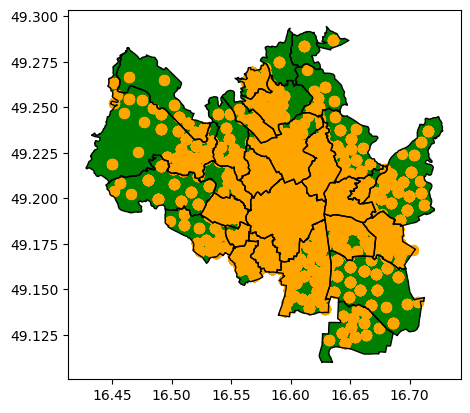

In [44]:
fig, ax = plt.subplots()
city_districts.boundary.plot(ax=ax, linewidth=1, edgecolor="black")
city_districts.plot(ax=ax, color='green', markersize=50)
points.plot(ax=ax, color='orange', markersize=50) 
plt.show()

7. přiřazení sloupců do tabulky trestných činů, kontrola počtu hodnot

In [45]:
crimes['coordinates'] = pointInPolys['coords']
crimes['City part code'] = pointInPolys['kod']
crimes['City part code'].nunique()

29

Zápis výsledného souboru

In [46]:
crimes.to_csv('trestne_ciny.csv', index=False)